In [1]:
import pandas as pd

import cudf
import cupy as cp
from cuml.cluster import KMeans

from tqdm import tqdm
from matplotlib import pyplot as plt

In [11]:
video_embeds = pd.read_orc('/kaggle/input/video-embeds-all/result_video_embeds_all.orc')

In [12]:
video_embeds

,video_id,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,973f24c0-15b2-434f-8740-4e2726f79c30,-0.583177,0.285638,0.275738,-0.121871,0.564524,-0.365153,0.362858,-0.751143,0.385155,...,0.000000,0.0,0.000000,0.000000,0.000000,1.656386,1.616750,0.0,0.0,0.0
1,1a3f527c-44b2-4f7e-9641-26f078edbf2e,-0.664851,0.707222,0.008053,-0.751596,0.373044,-0.562850,-0.102521,-0.893505,0.395862,...,0.000000,0.0,0.000000,-1.000000,40.500000,5.570802,5.649635,0.0,0.0,0.0
2,2f563d09-45ef-4e27-8da0-daa74235a2e7,-0.790165,0.310925,-0.659707,-0.643019,0.406513,0.042416,0.208823,-0.862269,-0.328970,...,0.000000,0.0,0.000000,160.000000,160.000000,0.342614,0.285310,0.0,0.0,0.0
3,154fac0e-1794-4406-afa0-61f688e3a764,-1.801291,0.815261,-0.024182,-0.223238,0.202299,-0.440562,0.153128,-0.455030,0.294274,...,92.079208,0.0,57.579208,97.190000,122.290606,0.418336,0.513562,186.0,1162.0,4550.0
4,470b4e3e-e06d-4370-80dc-34d6a78b22db,-0.051967,0.315467,-0.382886,-0.416392,0.510738,-0.441189,-0.089106,-0.616665,-0.140649,...,0.000000,0.0,1.000000,256.153846,178.888889,9.310358,9.290497,0.0,8.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555213,6e3067be-8602-4889-b296-3dbba9e29a14,-0.617720,0.739599,0.576742,-0.599602,-0.115528,-0.379457,-0.514471,-0.463430,0.005150,...,0.000000,0.0,14.428571,24.304348,15.923077,10.705581,12.762620,0.0,5.0,5.0
1555214,542bb668-c8ec-4047-80c6-d98b39d3b7ce,0.511209,-0.140758,0.924966,0.194347,0.247384,-0.693325,0.354614,-0.342760,-0.506073,...,0.000000,0.0,0.000000,0.000000,61.000000,1.446613,1.454383,0.0,0.0,2.0
1555215,eeeb7b1e-6e46-4633-a9fb-3782256857f5,-0.527841,0.753208,0.303927,-0.508716,0.018977,-0.792114,0.053869,-0.271284,-0.014065,...,0.000000,0.0,0.000000,0.000000,39.800000,8.950831,9.297989,0.0,0.0,9.0
1555216,7ef043b7-a34c-40c7-865e-1b251b00df72,0.037095,0.360533,-0.328072,-0.475727,0.593304,-0.608588,-0.109556,-0.532786,-0.096178,...,0.000000,0.0,74.000000,90.888889,96.227273,5.489105,3.679740,0.0,2.0,8.0


In [9]:
wcss = {}
silhouette = {}


for n in tqdm(range(40, 201, 2)):

    # Инициализируем модель KMeans из библиотеки cuML
    kmeans_gpu = KMeans(n_clusters=n, max_iter=300)

    # Обучаем модель на данных
    kmeans_gpu.fit(video_embeds.drop(columns=['video_id']))

    # Получаем метки кластеров
    labels = kmeans_gpu.labels_

    # Получаем центроиды кластеров
    centroids = kmeans_gpu.cluster_centers_

    wcss[n] = kmeans_gpu.inertia_
    
    #pred = kmeans_gpu.predict(video_embeds.drop(columns=['video_id']))
#     silhouette[n] = silhouette_score(logs, pred)
    
    
    print("Кластеризация завершена.")
    print(f"Получено {n} кластеров.")

  1%|          | 1/81 [00:11<15:57, 11.96s/it]

Кластеризация завершена.
Получено 40 кластеров.


  2%|▏         | 2/81 [00:21<13:51, 10.52s/it]

Кластеризация завершена.
Получено 42 кластеров.


  4%|▎         | 3/81 [00:35<15:29, 11.92s/it]

Кластеризация завершена.
Получено 44 кластеров.


  5%|▍         | 4/81 [00:46<14:57, 11.65s/it]

Кластеризация завершена.
Получено 46 кластеров.


  6%|▌         | 5/81 [01:00<16:07, 12.73s/it]

Кластеризация завершена.
Получено 48 кластеров.


  7%|▋         | 6/81 [01:13<15:50, 12.68s/it]

Кластеризация завершена.
Получено 50 кластеров.


  9%|▊         | 7/81 [01:25<15:33, 12.61s/it]

Кластеризация завершена.
Получено 52 кластеров.


 10%|▉         | 8/81 [01:37<15:05, 12.40s/it]

Кластеризация завершена.
Получено 54 кластеров.


 11%|█         | 9/81 [01:52<15:38, 13.03s/it]

Кластеризация завершена.
Получено 56 кластеров.


 12%|█▏        | 10/81 [02:06<15:44, 13.30s/it]

Кластеризация завершена.
Получено 58 кластеров.


 14%|█▎        | 11/81 [02:18<15:06, 12.95s/it]

Кластеризация завершена.
Получено 60 кластеров.


 15%|█▍        | 12/81 [02:35<16:28, 14.32s/it]

Кластеризация завершена.
Получено 62 кластеров.


 16%|█▌        | 13/81 [02:55<18:05, 15.96s/it]

Кластеризация завершена.
Получено 64 кластеров.


 17%|█▋        | 14/81 [03:10<17:36, 15.77s/it]

Кластеризация завершена.
Получено 66 кластеров.


 19%|█▊        | 15/81 [03:27<17:35, 15.99s/it]

Кластеризация завершена.
Получено 68 кластеров.


 20%|█▉        | 16/81 [03:45<18:03, 16.67s/it]

Кластеризация завершена.
Получено 70 кластеров.


 21%|██        | 17/81 [04:01<17:33, 16.45s/it]

Кластеризация завершена.
Получено 72 кластеров.


 22%|██▏       | 18/81 [04:20<18:00, 17.14s/it]

Кластеризация завершена.
Получено 74 кластеров.


 23%|██▎       | 19/81 [05:01<25:17, 24.48s/it]

Кластеризация завершена.
Получено 76 кластеров.


 25%|██▍       | 20/81 [05:26<24:48, 24.41s/it]

Кластеризация завершена.
Получено 78 кластеров.


 26%|██▌       | 21/81 [05:51<24:37, 24.63s/it]

Кластеризация завершена.
Получено 80 кластеров.


 27%|██▋       | 22/81 [06:15<24:00, 24.41s/it]

Кластеризация завершена.
Получено 82 кластеров.


 28%|██▊       | 23/81 [06:42<24:27, 25.29s/it]

Кластеризация завершена.
Получено 84 кластеров.


 30%|██▉       | 24/81 [07:04<23:03, 24.28s/it]

Кластеризация завершена.
Получено 86 кластеров.


 31%|███       | 25/81 [07:33<24:05, 25.82s/it]

Кластеризация завершена.
Получено 88 кластеров.


 32%|███▏      | 26/81 [08:03<24:43, 26.96s/it]

Кластеризация завершена.
Получено 90 кластеров.


 33%|███▎      | 27/81 [08:27<23:26, 26.05s/it]

Кластеризация завершена.
Получено 92 кластеров.


 35%|███▍      | 28/81 [08:51<22:32, 25.52s/it]

Кластеризация завершена.
Получено 94 кластеров.


 36%|███▌      | 29/81 [09:21<23:19, 26.92s/it]

Кластеризация завершена.
Получено 96 кластеров.


 37%|███▋      | 30/81 [09:45<22:01, 25.92s/it]

Кластеризация завершена.
Получено 98 кластеров.


 38%|███▊      | 31/81 [10:05<20:02, 24.05s/it]

Кластеризация завершена.
Получено 100 кластеров.


 40%|███▉      | 32/81 [10:38<21:50, 26.74s/it]

Кластеризация завершена.
Получено 102 кластеров.


 41%|████      | 33/81 [11:01<20:37, 25.79s/it]

Кластеризация завершена.
Получено 104 кластеров.


 42%|████▏     | 34/81 [11:28<20:27, 26.12s/it]

Кластеризация завершена.
Получено 106 кластеров.


 43%|████▎     | 35/81 [11:54<19:50, 25.88s/it]

Кластеризация завершена.
Получено 108 кластеров.


 44%|████▍     | 36/81 [12:20<19:36, 26.15s/it]

Кластеризация завершена.
Получено 110 кластеров.


 46%|████▌     | 37/81 [12:54<20:55, 28.53s/it]

Кластеризация завершена.
Получено 112 кластеров.


 47%|████▋     | 38/81 [13:22<20:12, 28.21s/it]

Кластеризация завершена.
Получено 114 кластеров.


 48%|████▊     | 39/81 [13:46<18:57, 27.09s/it]

Кластеризация завершена.
Получено 116 кластеров.


 49%|████▉     | 40/81 [14:26<21:03, 30.83s/it]

Кластеризация завершена.
Получено 118 кластеров.


 51%|█████     | 41/81 [15:04<21:56, 32.90s/it]

Кластеризация завершена.
Получено 120 кластеров.


 52%|█████▏    | 42/81 [15:25<19:03, 29.32s/it]

Кластеризация завершена.
Получено 122 кластеров.


 53%|█████▎    | 43/81 [15:58<19:21, 30.57s/it]

Кластеризация завершена.
Получено 124 кластеров.


 54%|█████▍    | 44/81 [16:30<19:05, 30.96s/it]

Кластеризация завершена.
Получено 126 кластеров.


 56%|█████▌    | 45/81 [17:01<18:38, 31.07s/it]

Кластеризация завершена.
Получено 128 кластеров.


 57%|█████▋    | 46/81 [17:36<18:51, 32.32s/it]

Кластеризация завершена.
Получено 130 кластеров.


 58%|█████▊    | 47/81 [18:16<19:28, 34.37s/it]

Кластеризация завершена.
Получено 132 кластеров.


 59%|█████▉    | 48/81 [19:00<20:28, 37.23s/it]

Кластеризация завершена.
Получено 134 кластеров.


 60%|██████    | 49/81 [19:43<20:50, 39.09s/it]

Кластеризация завершена.
Получено 136 кластеров.


 62%|██████▏   | 50/81 [20:23<20:23, 39.48s/it]

Кластеризация завершена.
Получено 138 кластеров.


 63%|██████▎   | 51/81 [20:57<18:52, 37.74s/it]

Кластеризация завершена.
Получено 140 кластеров.


 64%|██████▍   | 52/81 [21:47<19:59, 41.35s/it]

Кластеризация завершена.
Получено 142 кластеров.


 65%|██████▌   | 53/81 [22:22<18:21, 39.36s/it]

Кластеризация завершена.
Получено 144 кластеров.


 67%|██████▋   | 54/81 [23:21<20:29, 45.53s/it]

Кластеризация завершена.
Получено 146 кластеров.


 68%|██████▊   | 55/81 [24:05<19:24, 44.79s/it]

Кластеризация завершена.
Получено 148 кластеров.


 69%|██████▉   | 56/81 [24:46<18:18, 43.93s/it]

Кластеризация завершена.
Получено 150 кластеров.


 70%|███████   | 57/81 [25:31<17:36, 44.01s/it]

Кластеризация завершена.
Получено 152 кластеров.


 72%|███████▏  | 58/81 [26:24<17:53, 46.66s/it]

Кластеризация завершена.
Получено 154 кластеров.


 73%|███████▎  | 59/81 [27:14<17:30, 47.74s/it]

Кластеризация завершена.
Получено 156 кластеров.


 74%|███████▍  | 60/81 [28:21<18:46, 53.66s/it]

Кластеризация завершена.
Получено 158 кластеров.


 75%|███████▌  | 61/81 [28:59<16:20, 49.00s/it]

Кластеризация завершена.
Получено 160 кластеров.


 77%|███████▋  | 62/81 [29:50<15:39, 49.42s/it]

Кластеризация завершена.
Получено 162 кластеров.


 78%|███████▊  | 63/81 [30:26<13:37, 45.40s/it]

Кластеризация завершена.
Получено 164 кластеров.


 79%|███████▉  | 64/81 [31:06<12:26, 43.93s/it]

Кластеризация завершена.
Получено 166 кластеров.


 80%|████████  | 65/81 [31:50<11:41, 43.85s/it]

Кластеризация завершена.
Получено 168 кластеров.


 81%|████████▏ | 66/81 [32:30<10:41, 42.74s/it]

Кластеризация завершена.
Получено 170 кластеров.


 83%|████████▎ | 67/81 [33:17<10:15, 43.94s/it]

Кластеризация завершена.
Получено 172 кластеров.


 84%|████████▍ | 68/81 [34:01<09:33, 44.08s/it]

Кластеризация завершена.
Получено 174 кластеров.


 85%|████████▌ | 69/81 [34:44<08:44, 43.71s/it]

Кластеризация завершена.
Получено 176 кластеров.


 86%|████████▋ | 70/81 [35:44<08:55, 48.67s/it]

Кластеризация завершена.
Получено 178 кластеров.


 88%|████████▊ | 71/81 [36:32<08:02, 48.25s/it]

Кластеризация завершена.
Получено 180 кластеров.


 89%|████████▉ | 72/81 [37:10<06:47, 45.27s/it]

Кластеризация завершена.
Получено 182 кластеров.


 90%|█████████ | 73/81 [37:47<05:43, 42.96s/it]

Кластеризация завершена.
Получено 184 кластеров.


 91%|█████████▏| 74/81 [38:24<04:48, 41.15s/it]

Кластеризация завершена.
Получено 186 кластеров.


 93%|█████████▎| 75/81 [39:03<04:01, 40.33s/it]

Кластеризация завершена.
Получено 188 кластеров.


 94%|█████████▍| 76/81 [39:44<03:23, 40.70s/it]

Кластеризация завершена.
Получено 190 кластеров.


 95%|█████████▌| 77/81 [40:20<02:36, 39.22s/it]

Кластеризация завершена.
Получено 192 кластеров.


 96%|█████████▋| 78/81 [41:05<02:02, 40.89s/it]

Кластеризация завершена.
Получено 194 кластеров.


 98%|█████████▊| 79/81 [41:55<01:27, 43.52s/it]

Кластеризация завершена.
Получено 196 кластеров.


 99%|█████████▉| 80/81 [42:59<00:49, 49.87s/it]

Кластеризация завершена.
Получено 198 кластеров.


100%|██████████| 81/81 [43:50<00:00, 32.48s/it]

Кластеризация завершена.
Получено 200 кластеров.


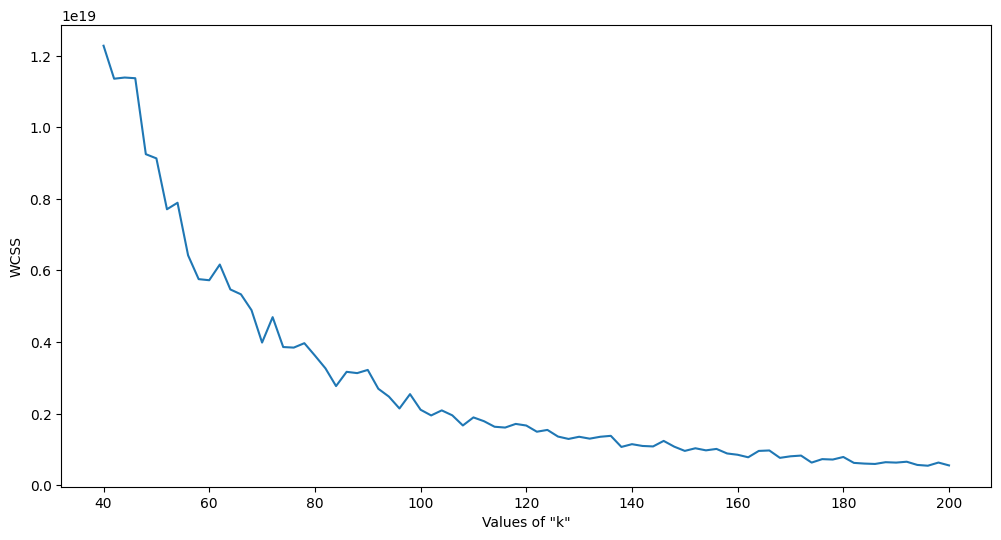

In [10]:
plt.figure(figsize=[12, 6])
plt.plot(wcss.keys(), wcss.values())
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [13]:
n_clusters = 120


# Инициализируем модель KMeans из библиотеки cuML
kmeans_gpu = KMeans(n_clusters=n_clusters, max_iter=300)

# Обучаем модель на данных
kmeans_gpu.fit(video_embeds.drop(columns=['video_id']))

# Получаем метки кластеров
labels = kmeans_gpu.labels_

# Получаем центроиды кластеров
centroids = kmeans_gpu.cluster_centers_

print("Кластеризация завершена.")
print(f"Получено {n_clusters} кластеров.")

Кластеризация завершена.
Получено 120 кластеров.


In [16]:
video_embeds['labels'] = labels

In [18]:
centroids.to_csv('centroids_video.csv')

In [19]:
video_embeds.to_parquet('video_embeds.parquet')